In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from medangel.data import preprocessing
from medangel.models import model_builder
from medangel.features import feature_creation
import numpy as np

In [2]:
df = preprocessing.load_relevant_data()

In [3]:
df.head()

doy_id  temperature            datetime  device_id
0  31948:2019:13         20.3 2019-01-13 04:59:02      31948
1  31948:2019:13         20.3 2019-01-13 05:02:01      31948
2  31948:2019:13         20.3 2019-01-13 05:05:00      31948
3  31948:2019:13         20.3 2019-01-13 05:07:59      31948
4  31948:2019:13         20.3 2019-01-13 05:10:58      31948

## Labelling Each Point

For this part I labelled each temperature reading in order to see how long the sensor is in a range outside the recommended 2C-8C range. 

In [4]:
df.loc[df['temperature']<=0,'label'] = 'Freezing'
df.loc[df['temperature'].between(0,2),'label'] = 'Cold'
df.loc[df['temperature'].between(2,8),'label'] = 'Ideal'
df.loc[df['temperature'].between(8,25),'label'] = 'Warm'
df.loc[25 < df['temperature'],'label'] = 'Hot'

In [5]:
pie_data = df['label'].value_counts()
pie_data = pie_data/pie_data.sum() * 100

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Temperature labels')

Text(0.0, 84.3, '84.3')

Text(1.0, 11.9, '11.9')

Text(2.0, 2.7, '2.7')

Text(3.0, 0.6, '0.6')

Text(4.0, 0.6, '0.6')

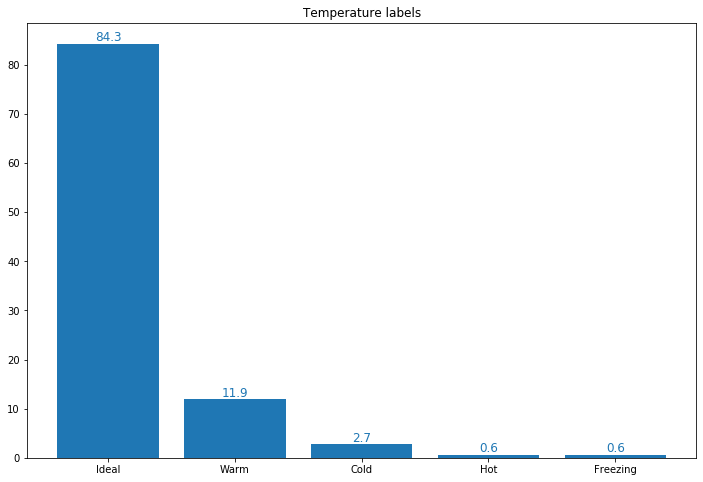

In [6]:
InteractiveShell.ast_node_interactivity = "last_expr"
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.title("Temperature labels")
ax = plt.bar(x=np.arange(5),height=pie_data,tick_label=pie_data.index,label=pie_data)
#ax.set_title('Temperature Split across all data')
for bar in ax.patches:
    bar_value = bar.get_height()
    bar_value = round(bar_value,1)
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
    text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
    text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
    text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
    bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
    plt.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)
plt.show()

# Looking into each Device separately

Here I wanted to see how long each device in the non-ideal temperature ranges. This will help me select the devices I want to use for testing my prediction method.

In [7]:
from datetime import datetime, timedelta

time_deltas = df['label'].value_counts() * timedelta(minutes=2,seconds=59)

In [8]:
time_deltas.index

Index(['Ideal', 'Warm', 'Cold', 'Hot', 'Freezing'], dtype='object')

In [9]:
devices = df["device_id"].value_counts()


In [10]:
for device in devices.index:
    df_temp = df[df["device_id"] == device]
    time_deltas_temp = df_temp['label'].value_counts() * timedelta(minutes=2,seconds=59)
    print("Device: " + str(device))
    for index,value in time_deltas_temp.items():
        print(str(index) + ": " + str(value))
    print("")

Device: 48790
Ideal: 160 days 05:10:07
Warm: 15 days 22:06:55
Cold: 1 days 06:58:37
Hot: 0 days 04:34:28
Freezing: 0 days 01:29:30

Device: 49486
Ideal: 135 days 08:18:11
Warm: 14 days 05:41:28
Cold: 4 days 16:58:08
Hot: 4 days 13:44:13

Device: 49589
Ideal: 125 days 02:28:35
Warm: 3 days 09:44:36
Cold: 1 days 05:20:10
Hot: 0 days 02:02:19

Device: 49446
Ideal: 109 days 23:57:06
Warm: 6 days 08:35:51
Cold: 4 days 05:28:59
Freezing: 0 days 04:49:23
Hot: 0 days 00:02:59

Device: 31948
Warm: 67 days 07:28:30
Ideal: 35 days 16:07:02
Hot: 0 days 05:46:04

Device: 52049
Ideal: 84 days 21:31:02
Warm: 6 days 12:01:42
Cold: 0 days 23:49:01
Freezing: 0 days 02:41:06
Hot: 0 days 00:14:55

Device: 52148
Ideal: 84 days 13:12:49
Warm: 4 days 13:35:16

Device: 49444
Ideal: 54 days 22:14:08
Warm: 2 days 06:05:52
Freezing: 2 days 02:54:56
Cold: 1 days 12:05:54
Hot: 0 days 00:02:59

Device: 49465
Ideal: 33 days 18:46:14
Warm: 0 days 18:20:51
Freezing: 0 days 01:14:35
Cold: 0 days 00:47:44
Hot: 0 days 00

In [11]:
InteractiveShell.ast_node_interactivity = "all"
df_ordered = pd.DataFrame(columns=df.columns)
df_ordered["order"] = pd.Series()
df_ordered
for device in devices.index:
    df_temp2 = df[df["device_id"] == device]
    df_temp2 = df_temp2.sort_values("datetime")
    df_temp2["order"] = range(df_temp2.shape[0])
    df_ordered = df_ordered.append(df_temp2 ,sort = True)
    

In [15]:
df_ordered = df_ordered[df_ordered["device_id"] == 49444]
df_ordered

datetime device_id          doy_id  label    order  \
55098  2019-07-25 16:32:11     49444  49444:2019:206    Hot      0.0   
55099  2019-07-25 16:35:10     49444  49444:2019:206   Warm      1.0   
55100  2019-07-25 16:38:09     49444  49444:2019:206   Warm      2.0   
55107  2019-07-25 16:42:39     49444  49444:2019:206   Warm      3.0   
55109  2019-07-25 16:46:30     49444  49444:2019:206   Warm      4.0   
...                    ...       ...             ...    ...      ...   
444382 2019-10-19 17:55:44     49444  49444:2019:292  Ideal  29346.0   
444383 2019-10-19 17:58:43     49444  49444:2019:292  Ideal  29347.0   
444384 2019-10-19 18:01:42     49444  49444:2019:292  Ideal  29348.0   
444385 2019-10-19 18:04:41     49444  49444:2019:292  Ideal  29349.0   
444386 2019-10-19 18:07:40     49444  49444:2019:292  Ideal  29350.0   

        temperature  
55098          29.1  
55099          21.3  
55100          18.3  
55107          15.0  
55109          12.9  
...             ...  
444382          4.9  
444383          4.9  
444384          5.0  
444385          5.0  
444386          5.1  

[29351 rows x 6 columns]

In [16]:
from tsfresh.utilities.dataframe_functions import roll_time_series
df_rolled = roll_time_series(df_ordered,column_sort="order", column_id="device_id",
                              max_timeshift=99,
                            min_timeshift=99)
#df_rolled.to_hdf(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_window_df.h5')
#df_rolled = pd.read_csv(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_window_df.csv', sep=',')


Rolling: 100%|██████████| 30/30 [00:44<00:00,  1.48s/it]


TypeError: to_hdf() missing 1 required positional argument: 'key'

In [19]:
df_rolled.to_hdf(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_window_df.h5', key='df')

In [20]:
df_rolled = df_rolled[df_rolled["device_id"] == 49444]
df_rolled

datetime device_id          doy_id  label    order  \
0       2019-07-25 16:32:11     49444  49444:2019:206    Hot      0.0   
1       2019-07-25 16:35:10     49444  49444:2019:206   Warm      1.0   
2       2019-07-25 16:38:09     49444  49444:2019:206   Warm      2.0   
3       2019-07-25 16:42:39     49444  49444:2019:206   Warm      3.0   
4       2019-07-25 16:46:30     49444  49444:2019:206   Warm      4.0   
...                     ...       ...             ...    ...      ...   
2925195 2019-10-19 17:55:44     49444  49444:2019:292  Ideal  29346.0   
2925196 2019-10-19 17:58:43     49444  49444:2019:292  Ideal  29347.0   
2925197 2019-10-19 18:01:42     49444  49444:2019:292  Ideal  29348.0   
2925198 2019-10-19 18:04:41     49444  49444:2019:292  Ideal  29349.0   
2925199 2019-10-19 18:07:40     49444  49444:2019:292  Ideal  29350.0   

         temperature                id  
0               29.1     (49444, 99.0)  
1               21.3     (49444, 99.0)  
2               18.3     (49444, 99.0)  
3               15.0     (49444, 99.0)  
4               12.9     (49444, 99.0)  
...              ...               ...  
2925195          4.9  (49444, 29350.0)  
2925196          4.9  (49444, 29350.0)  
2925197          5.0  (49444, 29350.0)  
2925198          5.0  (49444, 29350.0)  
2925199          5.1  (49444, 29350.0)  

[2925200 rows x 7 columns]

In [ ]:
#df_rolled.to_csv(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_window_df.csv', sep=',')

In [21]:
rolled_ids = df_rolled["id"].value_counts().index

In [22]:
y = pd.DataFrame(rolled_ids, columns = ["roll_id"])
y["roll_id"]

0        (49444, 19768.0)
1        (49444, 19685.0)
2        (49444, 22579.0)
3        (49444, 21462.0)
4        (49444, 21833.0)
               ...       
29247     (49444, 6880.0)
29248     (49444, 7323.0)
29249     (49444, 5694.0)
29250    (49444, 27089.0)
29251    (49444, 17619.0)
Name: roll_id, Length: 29252, dtype: object

In [ ]:
#preprocessing.rolling_labels("(52049, 38571.0)",df_rolled)

In [23]:
y["label"] = y.apply(lambda x: preprocessing.rolling_labels(x["roll_id"],df_rolled),axis=1)

In [ ]:
#df.loc[25 < df['temperature'],'label'] = 'Hot'

In [24]:
y

roll_id     label
0      (49444, 19768.0)     ideal
1      (49444, 19685.0)     ideal
2      (49444, 22579.0)     ideal
3      (49444, 21462.0)     ideal
4      (49444, 21833.0)     ideal
...                 ...       ...
29247   (49444, 6880.0)     ideal
29248   (49444, 7323.0)     ideal
29249   (49444, 5694.0)     ideal
29250  (49444, 27089.0)  freezing
29251  (49444, 17619.0)     ideal

[29252 rows x 2 columns]

In [26]:
y.to_hdf(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_labels_device_49444.h5', key='y')

In [51]:
y['seq_id'] = y['roll_id'].astype(str).str.split(r'\D',expand = True)[3].astype('int')

0        (49444, 19768.0)
1        (49444, 19685.0)
2        (49444, 22579.0)
3        (49444, 21462.0)
4        (49444, 21833.0)
               ...       
29247     (49444, 6880.0)
29248     (49444, 7323.0)
29249     (49444, 5694.0)
29250    (49444, 27089.0)
29251    (49444, 17619.0)
Name: roll_id, Length: 29252, dtype: object

In [52]:
y

roll_id     label  seq_id
0      (49444, 19768.0)     ideal   19768
1      (49444, 19685.0)     ideal   19685
2      (49444, 22579.0)     ideal   22579
3      (49444, 21462.0)     ideal   21462
4      (49444, 21833.0)     ideal   21833
...                 ...       ...     ...
29247   (49444, 6880.0)     ideal    6880
29248   (49444, 7323.0)     ideal    7323
29249   (49444, 5694.0)     ideal    5694
29250  (49444, 27089.0)  freezing   27089
29251  (49444, 17619.0)     ideal   17619

[29252 rows x 3 columns]

In [55]:
y_shifted = y.sort_values("seq_id",ascending = True)

In [59]:
y_shifted = y_shifted.reset_index(drop=True)

In [61]:
y_shifted["label_shifted"] = y_shifted["label"].shift(-100)

In [63]:
y_shifted = y_shifted.dropna()

In [66]:
import tsfresh
settings =  tsfresh.feature_extraction.ComprehensiveFCParameters()
comprehensive_features = tsfresh.feature_extraction.extract_features(df_rolled, 
                                                column_id = "id",
                                                column_sort = "datetime",
                                                default_fc_parameters=settings,
                                                column_value = "temperature")

    
    

nan_columns = comprehensive_features.columns[comprehensive_features.isna().any()].tolist()
comprehensive_features = comprehensive_features.drop(columns=nan_columns)


Feature Extraction: 100%|██████████| 30/30 [10:33<00:00, 21.12s/it]


In [67]:
comprehensive_features = comprehensive_features.loc[y_shifted["roll_id"]]


In [74]:
comprehensive_features = comprehensive_features.reset_index(drop=True)
y_shifted
comprehensive_features

roll_id  label  seq_id label_shifted
0         (49444, 99.0)    hot      99          warm
1        (49444, 100.0)   warm     100          warm
2        (49444, 101.0)   warm     101          warm
3        (49444, 102.0)   warm     102          warm
4        (49444, 103.0)   warm     103          warm
...                 ...    ...     ...           ...
29147  (49444, 29246.0)  ideal   29246         ideal
29148  (49444, 29247.0)  ideal   29247         ideal
29149  (49444, 29248.0)  ideal   29248         ideal
29150  (49444, 29249.0)  ideal   29249         ideal
29151  (49444, 29250.0)  ideal   29250         ideal

[29152 rows x 4 columns]

temperature__variance_larger_than_standard_deviation  \
0                                                    1.0      
1                                                    1.0      
2                                                    1.0      
3                                                    1.0      
4                                                    1.0      
...                                                  ...      
29147                                                0.0      
29148                                                0.0      
29149                                                0.0      
29150                                                0.0      
29151                                                0.0      

       temperature__has_duplicate_max  temperature__has_duplicate_min  \
0                                 0.0                             1.0   
1                                 0.0                             1.0   
2                                 0.0                             1.0   
3                                 0.0                             1.0   
4                                 0.0                             1.0   
...                               ...                             ...   
29147                             1.0                             1.0   
29148                             1.0                             1.0   
29149                             1.0                             1.0   
29150                             1.0                             1.0   
29151                             1.0                             1.0   

       temperature__has_duplicate  temperature__sum_values  \
0                             1.0                   1238.9   
1                             1.0                   1221.9   
2                             1.0                   1212.7   
3                             1.0                   1206.4   
4                             1.0                   1203.4   
...                           ...                      ...   
29147                         1.0                    574.5   
29148                         1.0                    574.1   
29149                         1.0                    573.7   
29150                         1.0                    573.5   
29151                         1.0                    573.5   

       temperature__abs_energy  temperature__mean_abs_change  \
0                     16220.45                      0.397980   
1                     15520.05                      0.319192   
2                     15212.77                      0.288889   
3                     15021.88                      0.256566   
4                     14940.88                      0.235354   
...                        ...                           ...   
29147                  3335.71                      0.078788   
29148                  3331.47                      0.079798   
29149                  3327.31                      0.078788   
29150                  3325.27                      0.076768   
29151                  3325.27                      0.076768   

       temperature__mean_change  temperature__mean_second_derivative_central  \
0                     -0.171717                                     0.039286   
1                     -0.092929                                     0.015306   
2                     -0.062626                                     0.016837   
3                     -0.030303                                     0.010204   
4                     -0.009091                                     0.005612   
...                         ...                                          ...   
29147                 -0.002020                                    -0.000510   
29148                 -0.003030                                     0.000000   
29149                 -0.002020                                     0.000510   
29150                  0.000000                            

In [75]:
from tsfresh import select_features
selected_features = select_features(comprehensive_features,y_shifted["label_shifted"])

In [76]:
selected_features

temperature__ratio_beyond_r_sigma__r_3  temperature__c3__lag_1  \
0                                        0.02             2063.906602   
1                                        0.02             1966.389388   
2                                        0.01             1924.804806   
3                                        0.01             1906.599398   
4                                        0.01             1901.080010   
...                                       ...                     ...   
29147                                    0.00              196.271296   
29148                                    0.00              196.212367   
29149                                    0.00              196.158796   
29150                                    0.00              196.133286   
29151                                    0.00              196.184306   

       temperature__root_mean_square  temperature__abs_energy  \
0                          12.735953                 16220.45   
1                          12.457949                 15520.05   
2                          12.334006                 15212.77   
3                          12.256378                 15021.88   
4                          12.223289                 14940.88   
...                              ...                      ...   
29147                       5.775561                  3335.71   
29148                       5.771889                  3331.47   
29149                       5.768284                  3327.31   
29150                       5.766515                  3325.27   
29151                       5.766515                  3325.27   

       temperature__c3__lag_2  temperature__c3__lag_3  \
0                 1979.203042             1943.507979   
1                 1926.558135             1911.755053   
2                 1906.045042             1900.243628   
3                 1897.201948             1895.581691   
4                 1895.959448             1896.691372   
...                       ...                     ...   
29147              196.645958              196.743936   
29148              196.851063              197.223426   
29149              197.046896              197.600021   
29150              197.207833              197.960574   
29151              197.388042              198.254191   

       temperature__quantile__q_0.9  temperature__sum_values  \
0                             14.54                   1238.9   
1                             14.50                   1221.9   
2                             14.50                   1212.7   
3                             14.50                   1206.4   
4                             14.41                   1203.4   
...                             ...                      ...   
29147                          6.50                    574.5   
29148                          6.50                    574.1   
29149                          6.50                    573.7   
29150                          6.50                    573.5   
29151                          6.50                    573.5   

       temperature__mean  temperature__fft_coefficient__attr_"abs"__coeff_0  \
0                 12.389                                             1238.9   
1                 12.219                                             1221.9   
2                 12.127                                             1212.7   
3                 12.064                                             1206.4   
4                 12.034                                             1203.4   
...                  ...                                                ...   
29147              5.745                                              574.5   
29148              5.741                                              574.1   
29149              5.737                                              573.7   
29150              5.735                                              573.5   
29151              5.735  

In [77]:
kmeans_selected,scaled_selected = model_builder.kmeans_clustering(selected_features)
scaled_selected_df = pd.DataFrame(scaled_selected, columns = selected_features.columns)
covMatrix_comp = pd.DataFrame.cov(scaled_selected_df)

In [78]:
from sklearn.decomposition import PCA
pca_85 = PCA(.85)
principal_components_85 = pca_85.fit_transform(scaled_selected_df)
sum(pca_85.explained_variance_ratio_)
pca_85.n_components_
pca_85.explained_variance_ratio_

0.8513309818842606

67

array([0.22571747, 0.15580091, 0.08910229, 0.03916918, 0.03589577,
       0.02799347, 0.02308049, 0.01750038, 0.01547337, 0.01410242,
       0.0122688 , 0.01194582, 0.01087187, 0.00916909, 0.00742094,
       0.00695916, 0.00674216, 0.00629463, 0.00580934, 0.00541174,
       0.00513758, 0.00477047, 0.00439135, 0.00422848, 0.0040739 ,
       0.00380522, 0.00366698, 0.00350268, 0.00343368, 0.00338082,
       0.00323108, 0.0031861 , 0.00295632, 0.00286564, 0.00278122,
       0.00275026, 0.00270276, 0.00261541, 0.00259207, 0.00250914,
       0.00249888, 0.00245819, 0.00243236, 0.00240288, 0.00229256,
       0.00226149, 0.00220308, 0.0021949 , 0.00212494, 0.00209754,
       0.00204544, 0.00202134, 0.00201814, 0.00199822, 0.00199504,
       0.00198133, 0.00196612, 0.0019612 , 0.00195776, 0.00195186,
       0.00193439, 0.00193193, 0.00191096, 0.00188518, 0.00185869,
       0.00183132, 0.00180479])

In [79]:
principalDf_85 = pd.DataFrame(data = principal_components_85,
                          columns = pd.Series(range(1,pca_85.n_components_ + 1)).astype("str"))

In [80]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline

rf_clf = make_pipeline(
    RandomUnderSampler(random_state=42),
    RandomForestClassifier(random_state=42, n_jobs=2),
)

In [88]:
cv_result = cross_validate(rf_clf, principalDf_85, y_shifted["label_shifted"].to_numpy(), scoring = ["accuracy", "balanced_accuracy"])

In [89]:
cv_result["test_accuracy"].mean()
cv_result["test_balanced_accuracy"].mean()

0.9640853332266502

0.9600022480305327

In [85]:
cv_result.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_balanced_accuracy'])

In [ ]:
#To Do:
#Automate the data processing for every ID
#Test The IDs using model at hand.
#Confirm that the process is correct

In [125]:

df_ordered = pd.DataFrame(columns=df.columns)
df_ordered["order"] = pd.Series()
for device in devices.index:
    df_temp2 = df[df["device_id"] == device]
    df_temp2 = df_temp2.sort_values("datetime")
    df_temp2["order"] = range(df_temp2.shape[0])
    df_ordered = df_ordered.append(df_temp2 ,sort = True)
    
df_ordered_59497 = df_ordered[df_ordered["device_id"] == 59497]

from tsfresh.utilities.dataframe_functions import roll_time_series
df_rolled_59497 = roll_time_series(df_ordered_59497,column_sort="order", column_id="device_id",
                              max_timeshift=99,
                            min_timeshift=99)
rolled_ids_59497 = df_rolled_59497["id"].value_counts().index
y_59497 = pd.DataFrame(rolled_ids_59497, columns = ["roll_id"])
y_59497["label"] = y_59497.apply(lambda x: preprocessing.rolling_labels(x["roll_id"],df_rolled_59497),axis=1)
y_59497['seq_id'] = y_59497['roll_id'].astype(str).str.split(r'\D',expand = True)[3].astype('int')
y_59497 = y_59497.sort_values("seq_id",ascending = True)
y_59497 = y_59497.reset_index(drop=True)
y_59497["label_shifted"] = y_59497["label"].shift(-100)
y_59497 = y_59497.dropna()


Rolling: 100%|██████████| 30/30 [00:09<00:00,  3.02it/s]


In [126]:
y_59497

roll_id     label  seq_id label_shifted
0       (59497, 99.0)     ideal      99         ideal
1      (59497, 100.0)     ideal     100         ideal
2      (59497, 101.0)     ideal     101         ideal
3      (59497, 102.0)     ideal     102         ideal
4      (59497, 103.0)     ideal     103         ideal
...               ...       ...     ...           ...
6257  (59497, 6356.0)  freezing    6356      freezing
6258  (59497, 6357.0)  freezing    6357      freezing
6259  (59497, 6358.0)  freezing    6358      freezing
6260  (59497, 6359.0)  freezing    6359      freezing
6261  (59497, 6360.0)  freezing    6360      freezing

[6262 rows x 4 columns]

In [127]:
x_test = tsfresh.feature_extraction.extract_features(df_rolled_59497, 
                                                column_id = "id",
                                                column_sort = "datetime",
                                                default_fc_parameters=settings,
                                                column_value = "temperature")

    
    

nan_columns = x_test.columns[x_test.isna().any()].tolist()
x_test = x_test.drop(columns=nan_columns)


Feature Extraction: 100%|██████████| 30/30 [03:13<00:00,  6.45s/it]


In [128]:

x_test = x_test[selected_features.columns]
x_test = x_test.loc[y_59497["roll_id"]]

In [129]:
_,scaled_selected_test = model_builder.kmeans_clustering(x_test)
scaled_selected_df_test = pd.DataFrame(scaled_selected_test, columns = x_test.columns)

In [130]:
pca_test = pca_85.transform(scaled_selected_df_test)
pca_df_test = pd.DataFrame(data = pca_test,
                          columns = pd.Series(range(1,pca_85.n_components_ + 1)).astype("str"))

In [131]:
y_59497

roll_id     label  seq_id label_shifted
0       (59497, 99.0)     ideal      99         ideal
1      (59497, 100.0)     ideal     100         ideal
2      (59497, 101.0)     ideal     101         ideal
3      (59497, 102.0)     ideal     102         ideal
4      (59497, 103.0)     ideal     103         ideal
...               ...       ...     ...           ...
6257  (59497, 6356.0)  freezing    6356      freezing
6258  (59497, 6357.0)  freezing    6357      freezing
6259  (59497, 6358.0)  freezing    6358      freezing
6260  (59497, 6359.0)  freezing    6359      freezing
6261  (59497, 6360.0)  freezing    6360      freezing

[6262 rows x 4 columns]

In [132]:
#from sklearn.metrics import classification_report
#print(classification_report(y_59497['label_shifted'], rf_clf.predict(pca_test)))

In [133]:
rus = RandomUnderSampler(random_state=42)
x_train,y_train = rus.fit_resample(principalDf_85, y_shifted["label_shifted"].to_numpy())

In [134]:
clf_2 = RandomForestClassifier(random_state=42, n_jobs=2)

In [136]:
clf_2.fit(x_train,y_train)

RandomForestClassifier(n_jobs=2, random_state=42)

In [137]:
print(classification_report(y_59497['label_shifted'], clf_2.predict(pca_df_test)))

C:\Python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-sc

              precision    recall  f1-score   support

        cold       0.00      0.00      0.00       557
    freezing       0.73      0.31      0.43      3200
       ideal       0.43      0.81      0.56      2505
        warm       0.00      0.00      0.00         0

    accuracy                           0.48      6262
   macro avg       0.29      0.28      0.25      6262
weighted avg       0.54      0.48      0.44      6262



In [177]:
x_final = pca_df_test.append(principalDf_85)

In [178]:
y_final = y_59497.append(y_shifted)

In [182]:
y_final["label_shifted"].value_counts()

ideal       28396
freezing     6219
cold          557
warm          242
Name: label_shifted, dtype: int64

In [183]:
rf_clf_final = make_pipeline(
    RandomUnderSampler(random_state=42),
    RandomForestClassifier(random_state=42, n_jobs=2),
)
cv_result_final = cross_validate(rf_clf_final,
                            x_final,
                            y_final["label_shifted"].to_numpy(),
                            scoring = ["accuracy", "balanced_accuracy"])
cv_result_final["test_accuracy"].mean()
cv_result_final["test_balanced_accuracy"].mean()

0.8614949509593016

0.8889475024130682

In [186]:
df_rolled.to_hdf(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_data_device_49444.h5', key='df')
y_shifted.to_hdf(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_labels_shifted_device_49444.h5', key='y')
y_59497.to_hdf(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_labels_shifted_device_59497.h5', key='y')
df_rolled_59497.to_hdf(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\rolling_data_device_59497.h5', key='df')